In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler



In [2]:
df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('test (1).csv')
#sub = pd.read_csv('data/raw/test_sub.csv')
df_train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74000,ID_-33.93_25.67_2022_45,-33.93,25.67,2022,45,0.001192,0.322510,0.000358,0.113889,-95.875226,...,6380.936608,54160.486756,5380.936607,32.711150,0.088256,-22.750184,51.561352,-67.067758,35.438041,34.115240
74001,ID_-33.93_25.67_2022_46,-33.93,25.67,2022,46,0.000196,0.393484,0.000081,0.095715,-104.357543,...,6080.303261,56345.002370,5080.302846,5.022155,0.030810,-21.652201,57.599384,-69.915866,33.520840,35.865158
74002,ID_-33.93_25.67_2022_47,-33.93,25.67,2022,47,0.000114,0.445499,0.000054,0.007275,76.966014,...,1478.970433,95206.933265,517.846957,4.096226,0.080515,-94.985989,62.034106,-83.159080,42.204499,35.511803
74003,ID_-33.93_25.67_2022_48,-33.93,25.67,2022,48,0.000092,0.377850,0.000035,0.077744,-12.476655,...,1722.604370,88203.562500,1166.031128,9.418262,0.113354,-105.555237,57.863998,-83.368256,39.928902,35.907146


In [3]:
def remove_outliers(df, columns):
    for col in columns:
        if col != 'ID_LAT_LON_YEAR_WEEK':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR
            df[col] = df[col].clip(lower_limit, upper_limit)
            mean = df[col].mean()
            df[col] = np.where(df[col] < lower_limit, mean, df[col])
            df[col] = np.where(df[col] > upper_limit, mean, df[col])
    return df

def preprocess(df):      
#     df.drop(columns=['UvAerosolLayerHeight_aerosol_height',                     
#                       'UvAerosolLayerHeight_aerosol_pressure',                     
#                       'UvAerosolLayerHeight_aerosol_optical_depth' ,                 
#                       'UvAerosolLayerHeight_sensor_zenith_angle'  ,                  
#                       'UvAerosolLayerHeight_sensor_azimuth_angle' ,                  
#                       'UvAerosolLayerHeight_solar_azimuth_angle'   ,                 
#                       'UvAerosolLayerHeight_solar_zenith_angle' , 
#                       #'latitude',
#                       #'longitude',
#                       'year',
#                     #'SulphurDioxide_cloud_fraction', 
#                     'SulphurDioxide_sensor_azimuth_angle',
#                     'SulphurDioxide_sensor_zenith_angle',
#                     'SulphurDioxide_solar_azimuth_angle',
#                     'SulphurDioxide_solar_zenith_angle',
#                     #'CarbonMonoxide_cloud_height', 
#                     'CarbonMonoxide_sensor_azimuth_angle',
#                     'CarbonMonoxide_sensor_zenith_angle',
#                     'CarbonMonoxide_solar_azimuth_angle',
#                     'CarbonMonoxide_solar_zenith_angle',
#                     #'NitrogenDioxide_stratospheric_NO2_column_number_density',
#                     #'NitrogenDioxide_tropopause_pressure',
#                     #'NitrogenDioxide_absorbing_aerosol_index',
#                     #'NitrogenDioxide_cloud_fraction',
#                     'NitrogenDioxide_sensor_azimuth_angle',
#                     'NitrogenDioxide_sensor_zenith_angle',
#                     'NitrogenDioxide_solar_azimuth_angle',
#                     'NitrogenDioxide_solar_zenith_angle',
#                     #'Formaldehyde_tropospheric_HCHO_column_number_density',
#                     #'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
#                     #'Formaldehyde_HCHO_slant_column_number_density',
#                     #'Formaldehyde_cloud_fraction',
#                     'Formaldehyde_solar_zenith_angle',
#                     'Formaldehyde_solar_azimuth_angle', 
#                     'Formaldehyde_sensor_zenith_angle',
#                     'Formaldehyde_sensor_azimuth_angle',
#                     #'Ozone_O3_column_number_density_amf',
#                     #'Ozone_O3_effective_temperature', 
#                     # 'Ozone_cloud_fraction',
#                     'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
#                     'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle',
#                     #'Cloud_cloud_fraction',
#                     #'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
#                     #'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
#                     #'Cloud_cloud_optical_depth'
#                                         ], inplace=True)
    
    
    weights = [0.4, 0.3, 0.3]
    df['NO2_density_combined'] = (weights[0]*df['NitrogenDioxide_NO2_column_number_density'] + 
                                weights[1]*df['NitrogenDioxide_tropospheric_NO2_column_number_density'] + 
                                weights[2]*df['NitrogenDioxide_NO2_slant_column_number_density'])
    
    df['N_pollution_industrielle'] = df['SulphurDioxide_SO2_column_number_density'] * df['CarbonMonoxide_CO_column_number_density']

    #df["NitrogenDioxide_density"] = df["NitrogenDioxide_NO2_column_number_density"] + df["NitrogenDioxide_tropospheric_NO2_column_number_density"] + df["NitrogenDioxide_NO2_slant_column_number_density"]
    #df["SulphurDioxide_densi"] = df['SulphurDioxide_SO2_column_number_density_15km','SulphurDioxide_SO2_slant_column_number_density','SulphurDioxide_SO2_column_number_density']
    df['K_taux_humidite'] = df['CarbonMonoxide_H2O_column_number_density'] / df['CarbonMonoxide_CO_column_number_density']
    #df['K_densite_optique_colNO2'] = df['NitrogenDioxide_NO2_column_number_density'] / df['NitrogenDioxide_NO2_slant_column_number_density']
    #df['K_densite_optique_col_SO2'] = df['SulphurDioxide_SO2_column_number_density'] / df['SulphurDioxide_SO2_slant_column_number_density']
    #df['K_densite_optique_col_O3'] = df['Ozone_O3_column_number_density'] / df['Ozone_O3_slant_column_number_density']
    #df['K_contribution_CO_SO2_pollution'] = df['CarbonMonoxide_CO_column_number_density'] / df['SulphurDioxide_SO2_column_number_density']
    #df['K_presence_simultanee_polluant'] = df['NitrogenDioxide_NO2_column_number_density'] * df['SulphurDioxide_SO2_column_number_density']
    #df['K_Ratio_SO2_NO2'] = df['SulphurDioxide_SO2_column_number_density'] / df['NitrogenDioxide_NO2_column_number_density']
    #df['K_Sum_NO2_SO2_O3'] = df['NitrogenDioxide_NO2_column_number_density'] + df['SulphurDioxide_SO2_column_number_density'] +df['Ozone_O3_column_number_density']
    #df['K_CO2_level'] = df['CarbonMonoxide_CO_column_number_density'] **2
    #df['K_Industrial_pollution'] = df['NitrogenDioxide_NO2_column_number_density'] * df['SulphurDioxide_SO2_column_number_density']
    #df['K_Solar_angle_diff'] = df['Cloud_solar_azimuth_angle'] - df['Cloud_sensor_azimuth_angle'] +df['Cloud_solar_zenith_angle']+df['Cloud_sensor_zenith_angle']
    
    #hedhi fortement corrélé 
    df['Y_densite_optique_colNO2_O3'] = df['NitrogenDioxide_NO2_column_number_density'] / df['Ozone_O3_column_number_density']
    #hedhi fortement corrélé 
    df['Y_colNO2_CO2'] = df['NitrogenDioxide_NO2_column_number_density'] / df['CarbonMonoxide_CO_column_number_density']
    #hedhi fortement corrélé 
    df['K_densite_optique_colNO2'] = df['NitrogenDioxide_NO2_column_number_density'] / df['NitrogenDioxide_NO2_slant_column_number_density']
    #hedhi fortement corrélé 
    df['K_presence_simultanee_polluant'] = df['NitrogenDioxide_NO2_column_number_density'] * df['SulphurDioxide_SO2_column_number_density']
    #hedhi fortement corrélé 
    df['N_pollution_industrielle'] = df['SulphurDioxide_SO2_column_number_density'] * df['CarbonMonoxide_CO_column_number_density']
    #df['Y_pollution_industrielle_SO2_HCHO'] = df['SulphurDioxide_SO2_column_number_density'] * df['Formaldehyde_tropospheric_HCHO_column_number_density']
   
    # Imputer les valeurs manquantes avec la moyenne
    imputer = SimpleImputer(strategy="mean")
    df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'] = imputer.fit_transform(df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'])
    
    df = remove_outliers(df, df.columns)
    df.drop(columns=[#'SulphurDioxide_SO2_column_number_density',
                     #'CarbonMonoxide_CO_column_number_density',
                     #'CarbonMonoxide_H2O_column_number_density',
                     'Ozone_O3_column_number_density',
                     'Ozone_O3_slant_column_number_density',
                     'Cloud_solar_azimuth_angle',
                     'Cloud_sensor_azimuth_angle',
                     'Cloud_solar_zenith_angle',
                     'Cloud_sensor_zenith_angle',
                     'Formaldehyde_tropospheric_HCHO_column_number_density',
                     'Formaldehyde_HCHO_slant_column_number_density',
                     'NitrogenDioxide_NO2_slant_column_number_density'
                     
                     ], inplace=True)
    
    
    df = df.groupby(['latitude', 'longitude','week_no']).mean().reset_index()

    
        
    #tsne = TSNE(n_components=3, perplexity=30)
    #df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'] = np.log1p(df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'])
    from sklearn.preprocessing import MinMaxScaler

    # Instancier le scaler MinMax
    scaler = RobustScaler()
    df.loc[:, (df.columns != 'ID_LAT_LON_YEAR_WEEK') & (df.columns != 'emission')  & (df.columns != 'longitude')   & (df.columns != 'latitude')] = scaler.fit_transform(df.loc[:, (df.columns != 'ID_LAT_LON_YEAR_WEEK') & (df.columns != 'emission') & (df.columns != 'longitude')  & (df.columns != 'latitude')])

  



    


    return df

In [4]:
df_train= preprocess(df_train)
#df_train = np.log1p(df_train)
df_train



C:\Users\LEOPARD\AppData\Local\Temp\ipykernel_1032\86745339.py:99: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'] = imputer.fit_transform(df.loc[:, df.columns != 'ID_LAT_LON_YEAR_WEEK'])
C:\Users\LEOPARD\AppData\Local\Temp\ipykernel_1032\86745339.py:118: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['latitude', 'longitude','week_no']).mean().reset_index()


,latitude,longitude,week_no,year,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,emission,NO2_density_combined,N_pollution_industrielle,K_taux_humidite,Y_densite_optique_colNO2_O3,Y_colNO2_CO2,K_densite_optique_colNO2,K_presence_simultanee_polluant
0,-33.93,25.47,-1.000000,0.0,-0.332846,0.348403,-0.229968,-0.227670,-0.163165,0.438383,...,0.749711,0.247446,5318.172475,-0.345909,-0.350807,0.872426,-0.238782,0.273264,-0.419053,-0.402171
1,-33.93,25.47,-0.961538,0.0,-0.052837,-0.125136,-0.083962,-1.175098,0.160379,-0.272740,...,1.486247,-0.100672,5632.135500,-0.601881,-0.130935,1.431490,-0.471514,0.017122,-0.426525,-0.130925
2,-33.93,25.47,-0.923077,0.0,-0.167881,0.059801,-0.147071,0.101562,-0.041117,0.424763,...,0.396003,0.319717,5766.657100,-0.347835,-0.171116,0.688872,-0.151996,-0.137777,-0.134006,-0.209706
3,-33.93,25.47,-0.884615,0.0,-0.098687,-0.397997,-0.380231,-0.603224,-0.010480,1.030481,...,-0.322896,-0.275453,5862.449750,0.131601,-0.127139,0.463803,-0.045069,0.294930,-0.741046,-0.137185
4,-33.93,25.47,-0.846154,0.0,-0.242152,-0.221427,-0.249427,-0.580622,-0.405157,-1.115673,...,0.300288,-0.313530,5985.671500,-0.228829,-0.303620,1.034420,-0.010287,0.454904,0.231351,-0.208708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22479,-23.73,29.67,0.500000,-6.0,0.543767,0.579743,0.861146,0.329617,-1.236198,0.255728,...,0.704401,0.105983,914.613025,-0.200742,1.155230,-0.393136,-0.409104,-1.593405,-0.579243,0.381542
22480,-23.73,29.67,0.653846,-1.0,-0.792723,1.218748,-1.068623,0.856628,-1.408824,-0.456658,...,0.122857,0.152651,1011.696800,-0.283838,-0.982849,-0.036670,-0.284056,-1.180328,-0.040765,-0.764423
22481,-23.73,29.67,0.807692,1.0,-0.843260,1.550822,-1.305573,0.253316,0.937180,-0.564040,...,-0.271604,0.130539,1018.072800,-0.628384,-0.820888,0.331854,-0.419809,-0.169300,0.159898,-0.799503
22482,-23.73,29.67,0.846154,-3.0,0.263476,0.490131,0.637915,-0.429594,-0.917262,-0.895485,...,2.140801,1.649187,897.217040,-0.135509,0.359044,0.400903,0.211203,-0.245864,0.705262,0.267593


In [5]:
# from sklearn.cluster import KMeans

# # X est votre ensemble de données avec les variables d'entrée, y est votre variable cible
# kmeans = KMeans(n_clusters=14, random_state=42).fit(df_train[['longitude','latitude']])

# # Créer la variable catégorielle
# df_train['cluster2'] = kmeans.predict(df_train[['longitude','latitude']])



df_train.all()


latitude                                     True
longitude                                    True
week_no                                     False
year                                        False
SulphurDioxide_SO2_column_number_density     True
                                            ...  
K_taux_humidite                              True
Y_densite_optique_colNO2_O3                  True
Y_colNO2_CO2                                 True
K_densite_optique_colNO2                     True
K_presence_simultanee_polluant               True
Length: 73, dtype: bool

In [6]:
df_train

,latitude,longitude,week_no,year,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,emission,NO2_density_combined,N_pollution_industrielle,K_taux_humidite,Y_densite_optique_colNO2_O3,Y_colNO2_CO2,K_densite_optique_colNO2,K_presence_simultanee_polluant
0,-33.93,25.47,-1.000000,0.0,-0.332846,0.348403,-0.229968,-0.227670,-0.163165,0.438383,...,0.749711,0.247446,5318.172475,-0.345909,-0.350807,0.872426,-0.238782,0.273264,-0.419053,-0.402171
1,-33.93,25.47,-0.961538,0.0,-0.052837,-0.125136,-0.083962,-1.175098,0.160379,-0.272740,...,1.486247,-0.100672,5632.135500,-0.601881,-0.130935,1.431490,-0.471514,0.017122,-0.426525,-0.130925
2,-33.93,25.47,-0.923077,0.0,-0.167881,0.059801,-0.147071,0.101562,-0.041117,0.424763,...,0.396003,0.319717,5766.657100,-0.347835,-0.171116,0.688872,-0.151996,-0.137777,-0.134006,-0.209706
3,-33.93,25.47,-0.884615,0.0,-0.098687,-0.397997,-0.380231,-0.603224,-0.010480,1.030481,...,-0.322896,-0.275453,5862.449750,0.131601,-0.127139,0.463803,-0.045069,0.294930,-0.741046,-0.137185
4,-33.93,25.47,-0.846154,0.0,-0.242152,-0.221427,-0.249427,-0.580622,-0.405157,-1.115673,...,0.300288,-0.313530,5985.671500,-0.228829,-0.303620,1.034420,-0.010287,0.454904,0.231351,-0.208708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22479,-23.73,29.67,0.500000,-6.0,0.543767,0.579743,0.861146,0.329617,-1.236198,0.255728,...,0.704401,0.105983,914.613025,-0.200742,1.155230,-0.393136,-0.409104,-1.593405,-0.579243,0.381542
22480,-23.73,29.67,0.653846,-1.0,-0.792723,1.218748,-1.068623,0.856628,-1.408824,-0.456658,...,0.122857,0.152651,1011.696800,-0.283838,-0.982849,-0.036670,-0.284056,-1.180328,-0.040765,-0.764423
22481,-23.73,29.67,0.807692,1.0,-0.843260,1.550822,-1.305573,0.253316,0.937180,-0.564040,...,-0.271604,0.130539,1018.072800,-0.628384,-0.820888,0.331854,-0.419809,-0.169300,0.159898,-0.799503
22482,-23.73,29.67,0.846154,-3.0,0.263476,0.490131,0.637915,-0.429594,-0.917262,-0.895485,...,2.140801,1.649187,897.217040,-0.135509,0.359044,0.400903,0.211203,-0.245864,0.705262,0.267593


In [7]:
# Top 20 correlated features to the target
top20_corrs = abs(df_train.corr()['emission']).sort_values(ascending = False).head(10)
top20_corrs=top20_corrs.index.tolist()
#top20_corrs.append('cluster2')


top20_corrs.append('latitude')



In [8]:
df_train=df_train[top20_corrs]

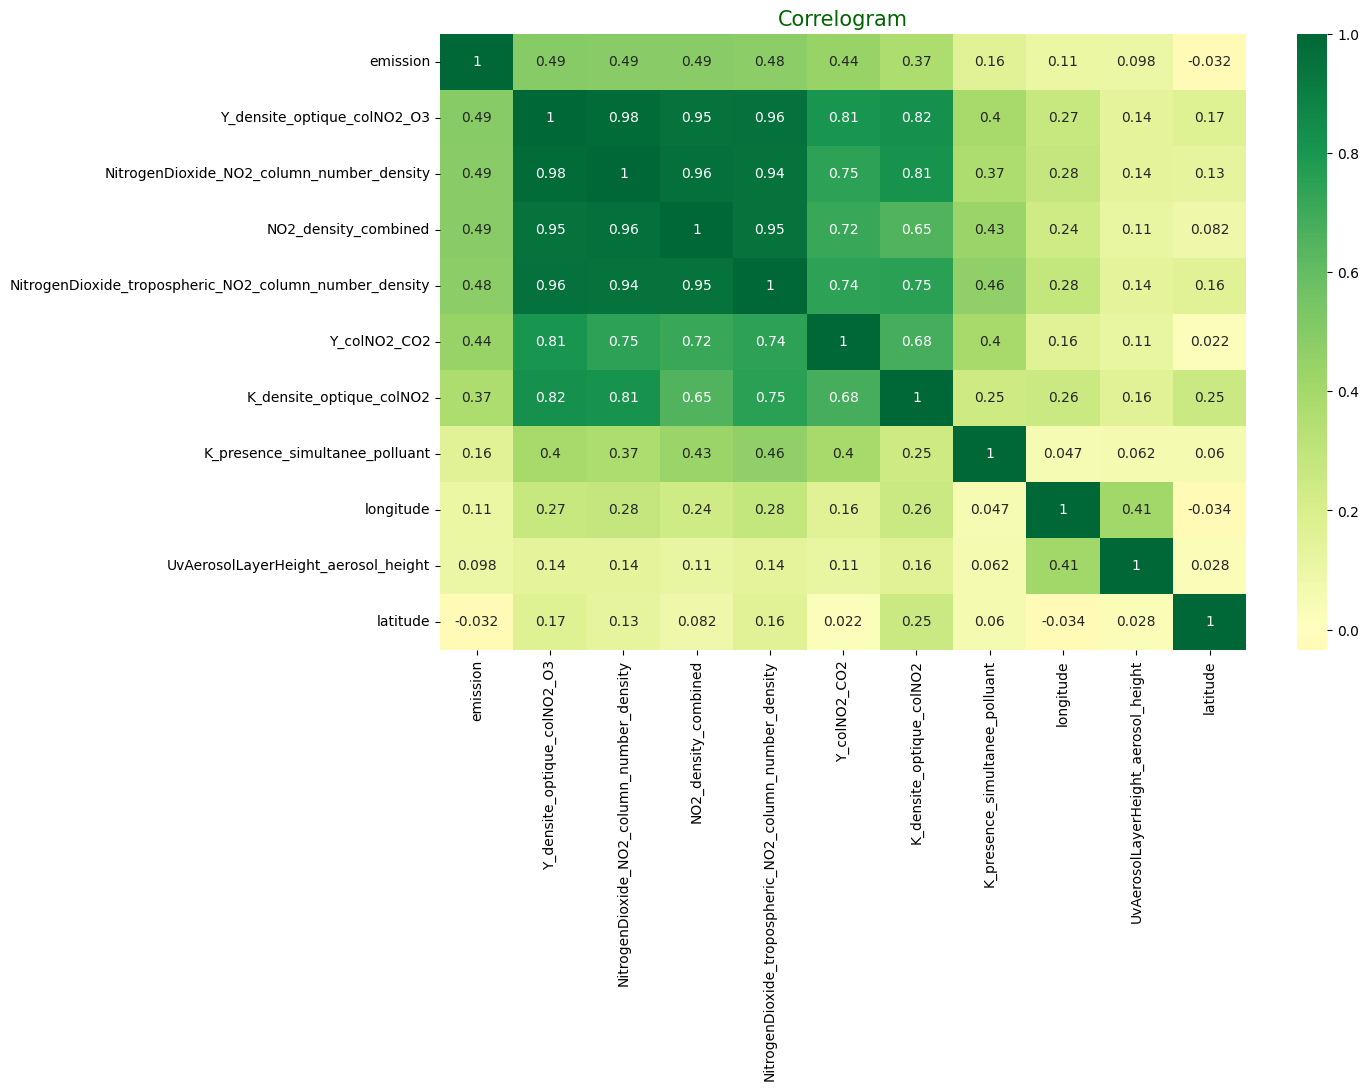

In [9]:
# Quantify correlations between features
corr = df_train[list(top20_corrs)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [10]:
from sklearn.model_selection import KFold, cross_val_score
features=[feature for feature in df_train.columns if  feature not in ['emission','ID_LAT_LON_YEAR_WEEK']  ]
x = df_train[features]
y=df_train.emission
#y = np.log1p(df_train.emission) 

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
xgb = xgboost.XGBRegressor( n_estimators=400, 
                            max_depth=45, 
                            learning_rate=0.05, 
                            subsample=0.8, 
                            gamma=0,
                            reg_alpha = 0.3) 
xgb.fit(x_train , y_train)
y_pred =  xgb.predict(x_test)

print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred))) #12296.827969774604 1ere #0.2159767984054401 2eme
#RMSE =  1805.7699004038325 3eme RMSE =  1807.345079016292 4eme
#RMSE =  1798.4610993998451 5eme   RMSE =  1792.0780929497287 6eme RMSE =  1790.0844954729312 7eme
#RMSE =  2093.7439176545454 8eme  RMSE =  1.4830975815722707 

RMSE =  246.90402158866434


In [11]:
# Analyse predictions
pred_errors = x_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)

pred_errors.head(206)

,latitude,longitude,emission,prediction,error
22433,-23.73,29.47,665.205260,5217.135254,4551.929994
20718,-23.93,29.47,6700.752450,2374.015869,4326.736581
11449,-27.23,24.97,178.308670,2711.115234,2532.806564
10162,-28.23,26.87,263.738835,2323.046143,2059.307308
10158,-28.23,26.87,290.417660,2334.497070,2044.079410
...,...,...,...,...,...
7115,-29.53,31.17,4655.008000,4149.666992,505.341008
6242,-29.63,30.97,6700.752450,6196.579102,504.173348
12970,-26.93,24.77,4162.496000,4666.270508,503.774508
18487,-24.33,29.37,2593.802650,3095.758545,501.955895


In [12]:
# Set the pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


pred_errors.head(206)

,latitude,longitude,emission,prediction,error
22433,-23.73,29.47,665.205260,5217.135254,4551.929994
20718,-23.93,29.47,6700.752450,2374.015869,4326.736581
11449,-27.23,24.97,178.308670,2711.115234,2532.806564
10162,-28.23,26.87,263.738835,2323.046143,2059.307308
10158,-28.23,26.87,290.417660,2334.497070,2044.079410
10384,-28.23,26.87,272.489688,2158.127197,1885.637510
10373,-28.23,26.87,304.085673,2171.552002,1867.466329
6872,-29.53,31.17,5704.692400,3876.560791,1828.131609
6332,-29.63,31.07,6700.752450,4934.681152,1766.071298
6241,-29.63,30.97,6700.752450,4987.973145,1712.779305


In [13]:
pred_errors.error.describe()

count    4497.000000
mean      107.888317
std       222.109606
min         0.005650
25%         7.026145
50%        32.374391
75%       110.731942
max      4551.929994
Name: error, dtype: float64

In [14]:
import geopandas as gpd
# Combine train and test for easy visualisation
train_coords = pred_errors.drop_duplicates(subset = ['latitude', 'longitude'])

# Create point geometries

geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude", "error"]], geometry=geometry
)

# Preview the geopandas df
geo_df = geo_df.reset_index(drop=True)
geo_df.tail(20)


,latitude,longitude,error,geometry
644,-27.13,24.57,3.615394,POINT (24.57000 -27.13000)
645,-26.83,24.87,3.327857,POINT (24.87000 -26.83000)
646,-27.23,24.57,3.241578,POINT (24.57000 -27.23000)
647,-27.03,24.67,3.140811,POINT (24.67000 -27.03000)
648,-28.03,22.47,2.915950,POINT (22.47000 -28.03000)
649,-27.23,24.47,2.792388,POINT (24.47000 -27.23000)
650,-27.13,24.67,2.461551,POINT (24.67000 -27.13000)
651,-26.93,24.57,2.093370,POINT (24.57000 -26.93000)
652,-26.83,24.87,1.750744,POINT (24.87000 -26.83000)
653,-26.23,28.07,1.681649,POINT (28.07000 -26.23000)


In [15]:
import folium
# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo_df.error[i] < int(100):
        type_color = "green"
    else:
        type_color = "red" 

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  type_color,
        
        ))
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

In [ ]:

features=[col for col in df_train.columns if  col not in ['emission' ,'ID_LAT_LON_YEAR_WEEK' ]  ] 
df_test = pd.read_csv('test (1).csv')                                 
preprocessed_test = preprocess(df_test) 

x = preprocessed_test[features]

predicted =  xgb.predict(x)

submission  = df_test[['ID_LAT_LON_YEAR_WEEK']]
submission['emission'] = predicted.reshape((predicted.shape[0]))
submission.to_csv('sampleSubmission(umoja).csv',index=False)
#print('RMSE = ', np.sqrt(mean_squared_error(sub.emission, submission.emission)))
submission 